In [89]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout,RepeatVector,TimeDistributed
mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
cd drive/My Drive/Data

[Errno 2] No such file or directory: 'drive/My Drive/Data'
/content/drive/My Drive/Data


In [92]:
df1=pd.read_csv("NSE Training.csv")
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/4/2016,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,1/5/2016,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,1/6/2016,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,1/7/2016,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,1/8/2016,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [93]:
df2=pd.read_csv("NSE Testing.csv")
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2022,17387.15039,17646.65039,17383.30078,17625.69922,17625.69922,200500
1,1/4/2022,17681.40039,17827.59961,17593.55078,17805.25000,17805.25000,247400
2,1/5/2022,17820.09961,17944.69922,17748.84961,17925.25000,17925.25000,251500
3,1/6/2022,17768.50000,17797.94922,17655.55078,17745.90039,17745.90039,236500
4,1/7/2022,17797.59961,17905.00000,17704.55078,17812.69922,17812.69922,239300


In [94]:
df3=pd.concat([df1,df2],axis=0,ignore_index=True)
df3.tail(25)

,Date,Open,High,Low,Close,Adj Close,Volume
1479,12/30/2021,17201.44922,17264.05078,17146.34961,17203.94922,17203.94922,320800.0
1480,12/31/2021,17244.50000,17400.80078,17238.50000,17354.05078,17354.05078,167000.0
1481,1/3/2022,17387.15039,17646.65039,17383.30078,17625.69922,17625.69922,200500.0
1482,1/4/2022,17681.40039,17827.59961,17593.55078,17805.25000,17805.25000,247400.0
1483,1/5/2022,17820.09961,17944.69922,17748.84961,17925.25000,17925.25000,251500.0
1484,1/6/2022,17768.50000,17797.94922,17655.55078,17745.90039,17745.90039,236500.0
1485,1/7/2022,17797.59961,17905.00000,17704.55078,17812.69922,17812.69922,239300.0
1486,1/10/2022,17913.30078,18017.44922,17879.15039,18003.30078,18003.30078,232400.0
1487,1/11/2022,17997.75000,18081.25000,17964.40039,18055.75000,18055.75000,220200.0
1488,1/12/2022,18170.40039,18227.94922,18128.80078,18212.34961,18212.34961,245000.0


In [95]:
df3.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [96]:
df3=df3.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498 entries, 0 to 1503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1498 non-null   object 
 1   Open       1498 non-null   float64
 2   High       1498 non-null   float64
 3   Low        1498 non-null   float64
 4   Close      1498 non-null   float64
 5   Adj Close  1498 non-null   float64
 6   Volume     1498 non-null   float64
dtypes: float64(6), object(1)
memory usage: 93.6+ KB


In [173]:
df4=df3.reset_index()['Adj Close']

In [174]:
import plotly.graph_objects as go

In [175]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=new_df['Date'],y=new_df['Adj Close'],name='Closing Price'))
fig.update_layout(showlegend=True,title='NSE Stock Price')
fig.show()

In [179]:
scaler=MinMaxScaler(feature_range=(0,1))
df4=scaler.fit_transform(np.array(df4).reshape(-1,1))

In [180]:
train=new_df.loc[0:1480,:]
test=new_df.loc[1481:,:]
train.shape,test.shape

((1475, 2), (23, 2))

In [192]:
TIME_STEPS=3

def create_sequences(X, y, time_steps=TIME_STEPS):
    X_out, y_out = [], []
    for i in range(len(X)-time_steps):
        X_out.append(X.iloc[i:(i+time_steps)].values)
        y_out.append(y.iloc[i+time_steps])
    
    return np.array(X_out), np.array(y_out)

X_train, y_train = create_sequences(train[['Adj Close']], train['Adj Close'])
X_test, y_test = create_sequences(test[['Adj Close']], test['Adj Close'])
print("Training input shape: ", X_train.shape)
print("Testing input shape: ", X_test.shape)
print(y_train.shape)
print(y_test.shape)

Training input shape:  (1472, 3, 1)
Testing input shape:  (20, 3, 1)
(1472,)
(20,)


In [193]:
from tensorflow import keras

In [194]:
np.random.seed(21)
tf.random.set_seed(21)

In [195]:
model = Sequential()
model.add(LSTM(128, activation = 'tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128, activation = 'tanh', return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 128)               66560     
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 repeat_vector_5 (RepeatVect  (None, 3, 128)           0         
 or)                                                             
                                                                 
 lstm_26 (LSTM)              (None, 3, 128)            131584    
                                                                 
 dropout_23 (Dropout)        (None, 3, 128)            0         
                                                                 
 time_distributed_5 (TimeDis  (None, 3, 1)             129       
 tributed)                                            

In [196]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')],
                    shuffle=False)
             

Epoch 1/100
42/42 [==============================] - 4s 27ms/step - loss: 0.0123 - val_loss: 0.0187
Epoch 2/100
42/42 [==============================] - 0s 9ms/step - loss: 0.0153 - val_loss: 0.0047
Epoch 3/100
42/42 [==============================] - 0s 10ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 4/100
42/42 [==============================] - 0s 10ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 5/100
42/42 [==============================] - 0s 10ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 6/100
42/42 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 7/100
42/42 [==============================] - 0s 9ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 8/100
42/42 [==============================] - 0s 10ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 9/100
42/42 [==============================] - 0s 10ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 10/100
42/42 [==============================] - 0s 10ms/step - loss: 0.0016 - val_loss: 0.0018
E

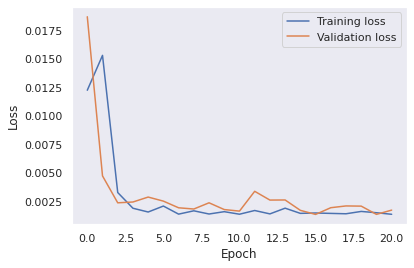

In [197]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();